# Exploratory Data Analysis (EDA) on Code QA Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load JSON data
with open('CodeQA_dataset.json') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)
df.head()

,code,question,answer
0,def Make Suite From Dict d label None suite Su...,What does the code make ?,a suite
1,def Make Suite From Dict d label None suite Su...,Does the code make a suite ?,Yes
2,def receive message topic name subscription na...,Does the code receive a message from a pull su...,Yes
3,def receive message topic name subscription na...,What does the code receive from a pull subscri...,a message
4,def Create Shared Budget client budget service...,What be an explicit budget used only ?,to create the campaign


In [3]:
# Basic structure
print("Dataset Shape:", df.shape)
print("\nColumn Types:\n", df.dtypes)

Dataset Shape: (56085, 3)

Column Types:
 code        object
question    object
answer      object
dtype: object


In [4]:
# Check for missing values
df.isnull().sum()

code        0
question    0
answer      0
dtype: int64

In [5]:
# Unique values per column
df.nunique()

code        33982
question    33971
answer      32425
dtype: int64

In [6]:
# Value counts for the 'answer' column
df['answer'].value_counts()

answer
Yes                           501
No                            393
this                          305
a string                      273
decorator                     201
                             ... 
in html                         1
a powershell dsc module         1
the index_in_children_list      1
a scheme instance               1
using the args                  1
Name: count, Length: 32425, dtype: int64

In [7]:
# Length of code snippets
df['code_length'] = df['code'].apply(len)
df['code_length'].describe()

count    56085.000000
mean       299.190924
std        240.250923
min         12.000000
25%        138.000000
50%        242.000000
75%        407.000000
max      18297.000000
Name: code_length, dtype: float64

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


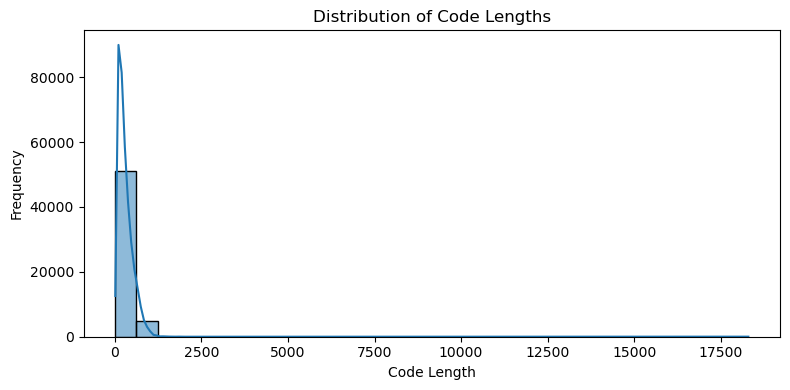

In [8]:
# Plot distribution of code length
plt.figure(figsize=(8, 4))
sns.histplot(df['code_length'], bins=30, kde=True)
plt.title('Distribution of Code Lengths')
plt.xlabel('Code Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [9]:
# Function to classify question types
def classify_question_type(q):
    q_lower = q.lower()
    if q_lower.startswith("what"):
        return "What"
    elif q_lower.startswith("how"):
        return "How"
    elif q_lower.startswith("where"):
        return "Where"
    elif q_lower.startswith("when"):
        return "When"
    elif q_lower.startswith("why"):
        return "Why"
    elif q_lower.startswith("for what purpose"):
        return "For what purpose"
    elif q_lower.startswith("does") or q_lower.startswith("do") or q_lower.startswith("is") or q_lower.startswith("are") or q_lower.startswith("can"):
        return "Yes/No"
    else:
        return "Other"

# Apply classification
df['question_type'] = df['question'].apply(classify_question_type)

# Compute percentages
question_type_counts = df['question_type'].value_counts(normalize=True) * 100
question_type_counts = question_type_counts.rename("Percentage").reset_index().rename(columns={"index": "Question Type"})

# Display table
#import ace_tools as tools; tools.display_dataframe_to_user(name="Question Type Distribution", dataframe=question_type_counts)

# Also return the DataFrame for further inspection
question_type_counts

,question_type,Percentage
0,What,70.008024
1,How,11.798164
2,Where,5.796559
3,When,4.826602
4,For what purpose,3.822769
5,Other,2.196666
6,Yes/No,1.367567
7,Why,0.183650


In [10]:
print(question_type_counts)


      question_type  Percentage
0              What   70.008024
1               How   11.798164
2             Where    5.796559
3              When    4.826602
4  For what purpose    3.822769
5             Other    2.196666
6            Yes/No    1.367567
7               Why    0.183650


In [11]:
# Check column names to make sure they are what we expect
print(question_type_counts.columns)

Index(['question_type', 'Percentage'], dtype='object')


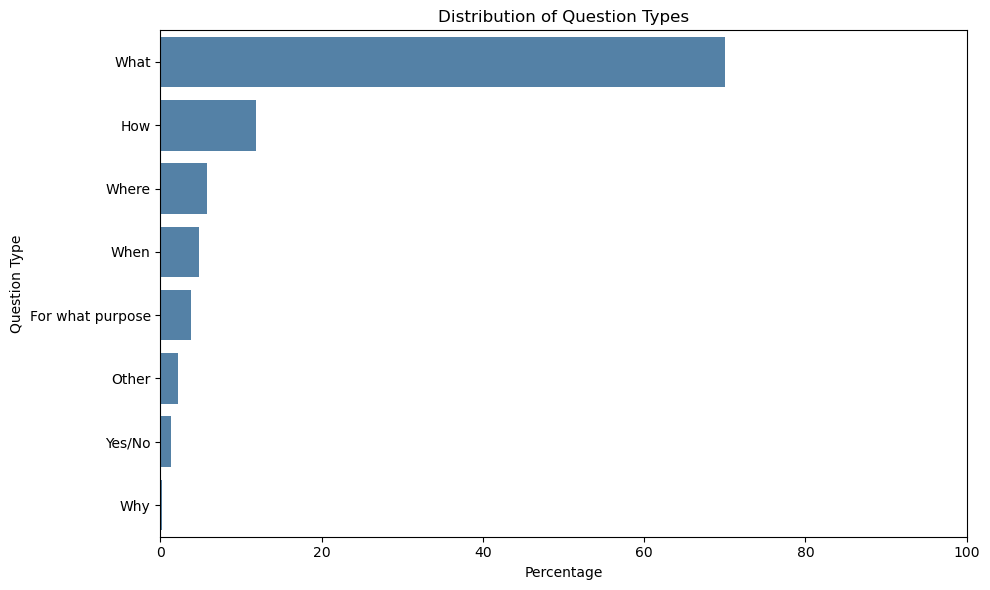

In [13]:


# Rename columns if necessary (optional, only if names are wrong)
# question_type_counts.columns = ["Question Type", "Percentage"]

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=question_type_counts, x="Percentage", y="question_type", color='steelblue')
plt.title("Distribution of Question Types")
plt.xlabel("Percentage")
plt.ylabel("Question Type")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()
